<a href="https://colab.research.google.com/github/tanvibahedia/EmotionAnalysisUsingEEGBrainwavesDataset/blob/main/EmotionAnaylysisUsingEEGBrainwaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#importing Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
#Reading dataset
data = pd.read_csv("/content/emotions.csv")

In [3]:
data.shape

(2132, 2549)

In [4]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

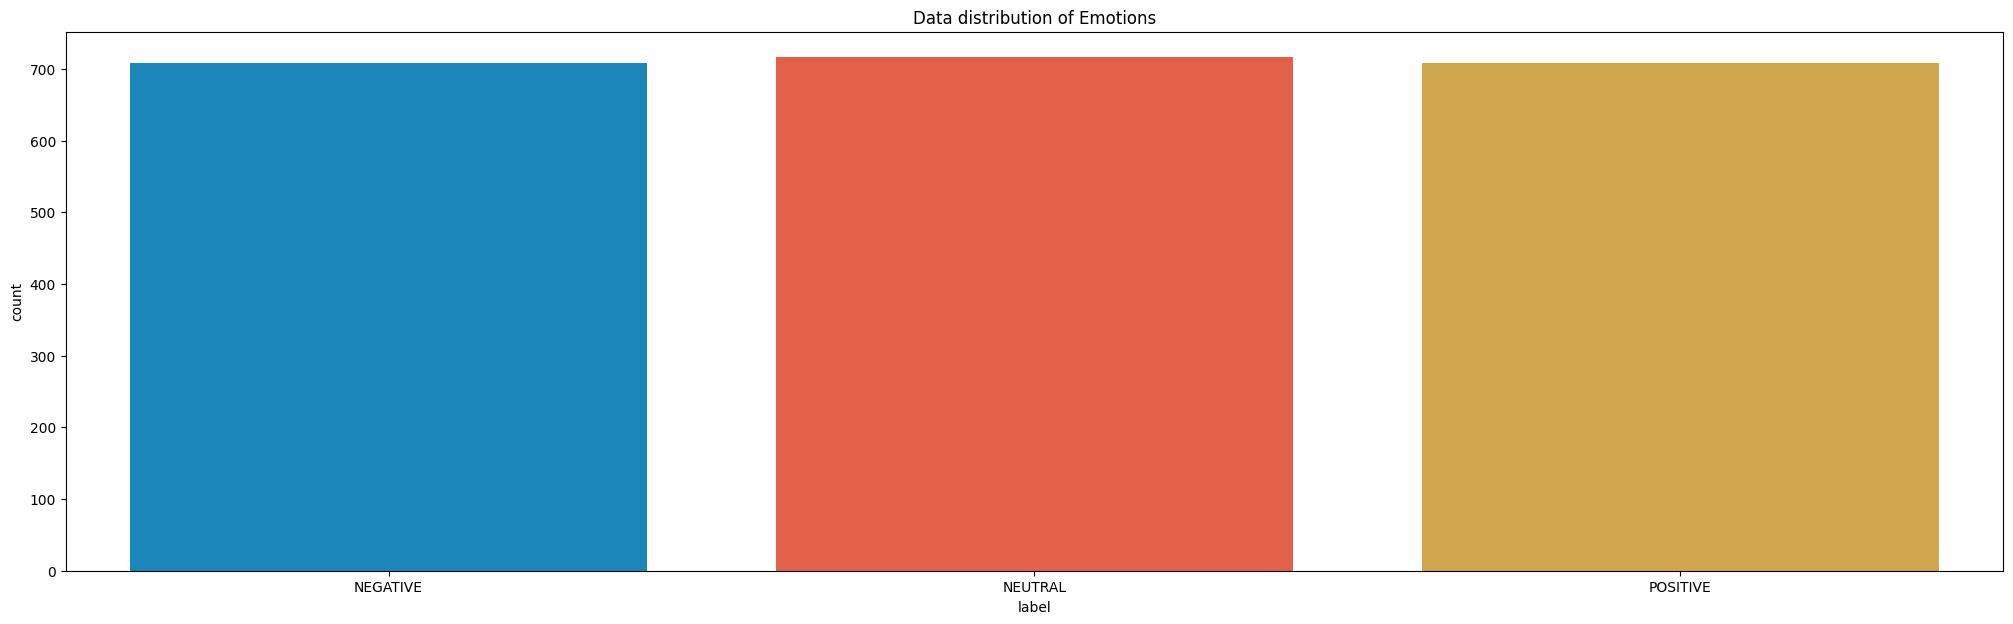

In [5]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

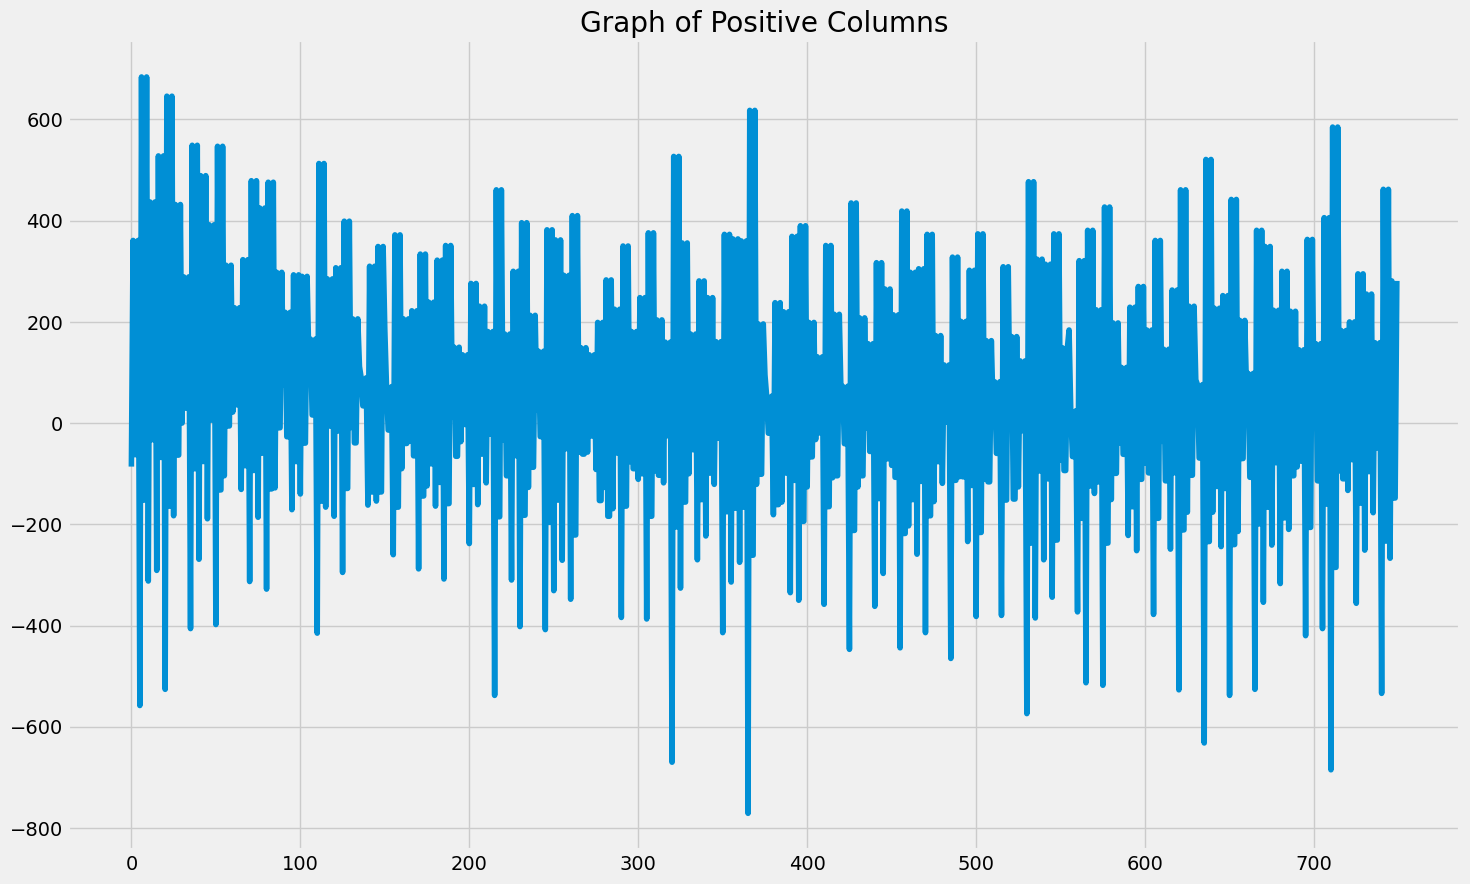

'As we can noticed the most of the Positive Signals are from greater than 600 to and less than than -600'

In [6]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()
'''As we can noticed the most of the Positive Signals are from greater than 600 to and less than than -600'''

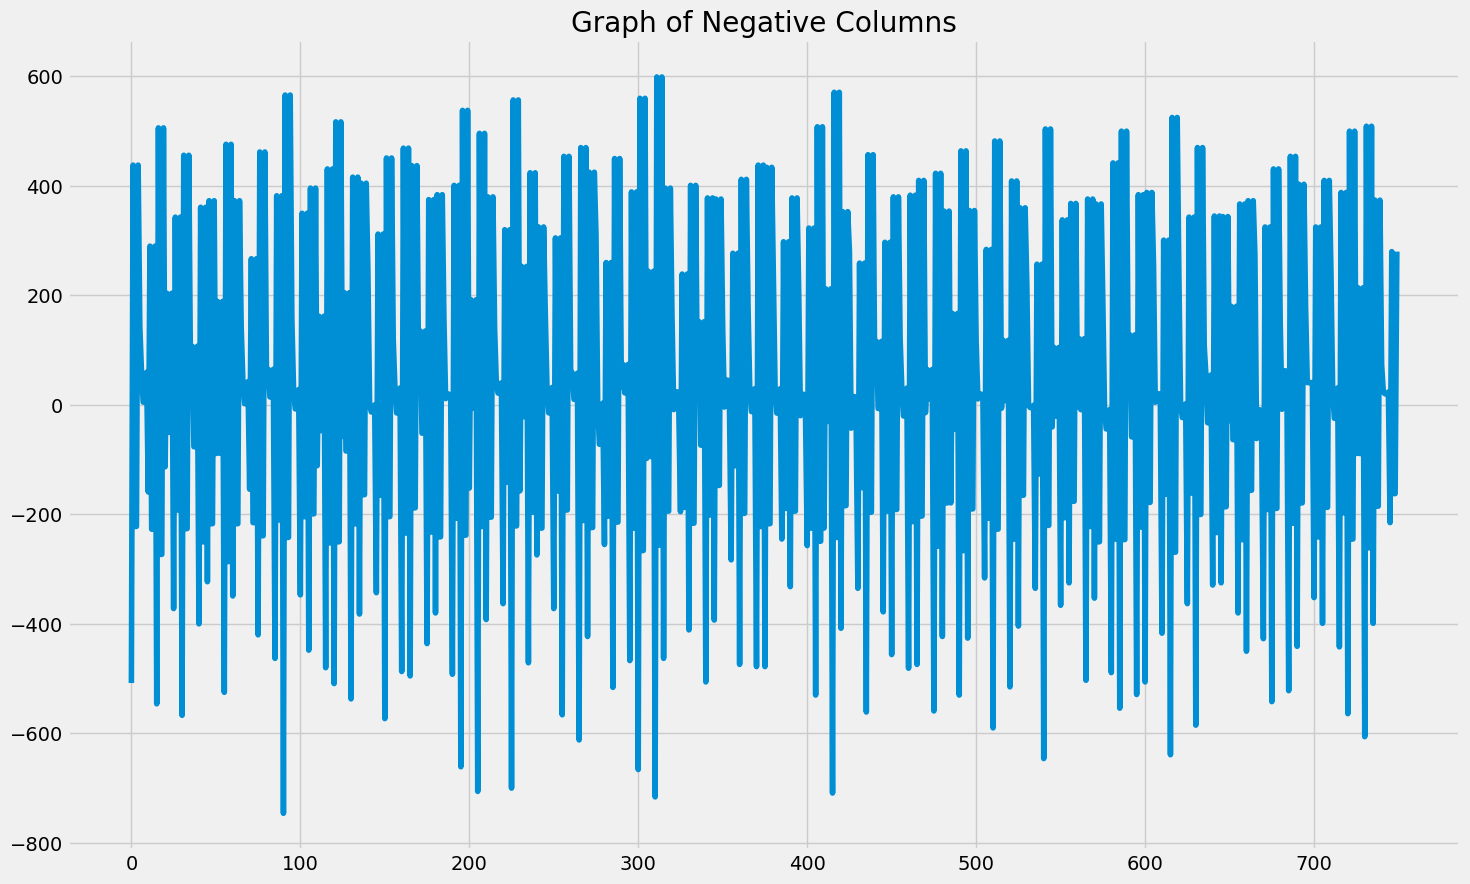

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [7]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

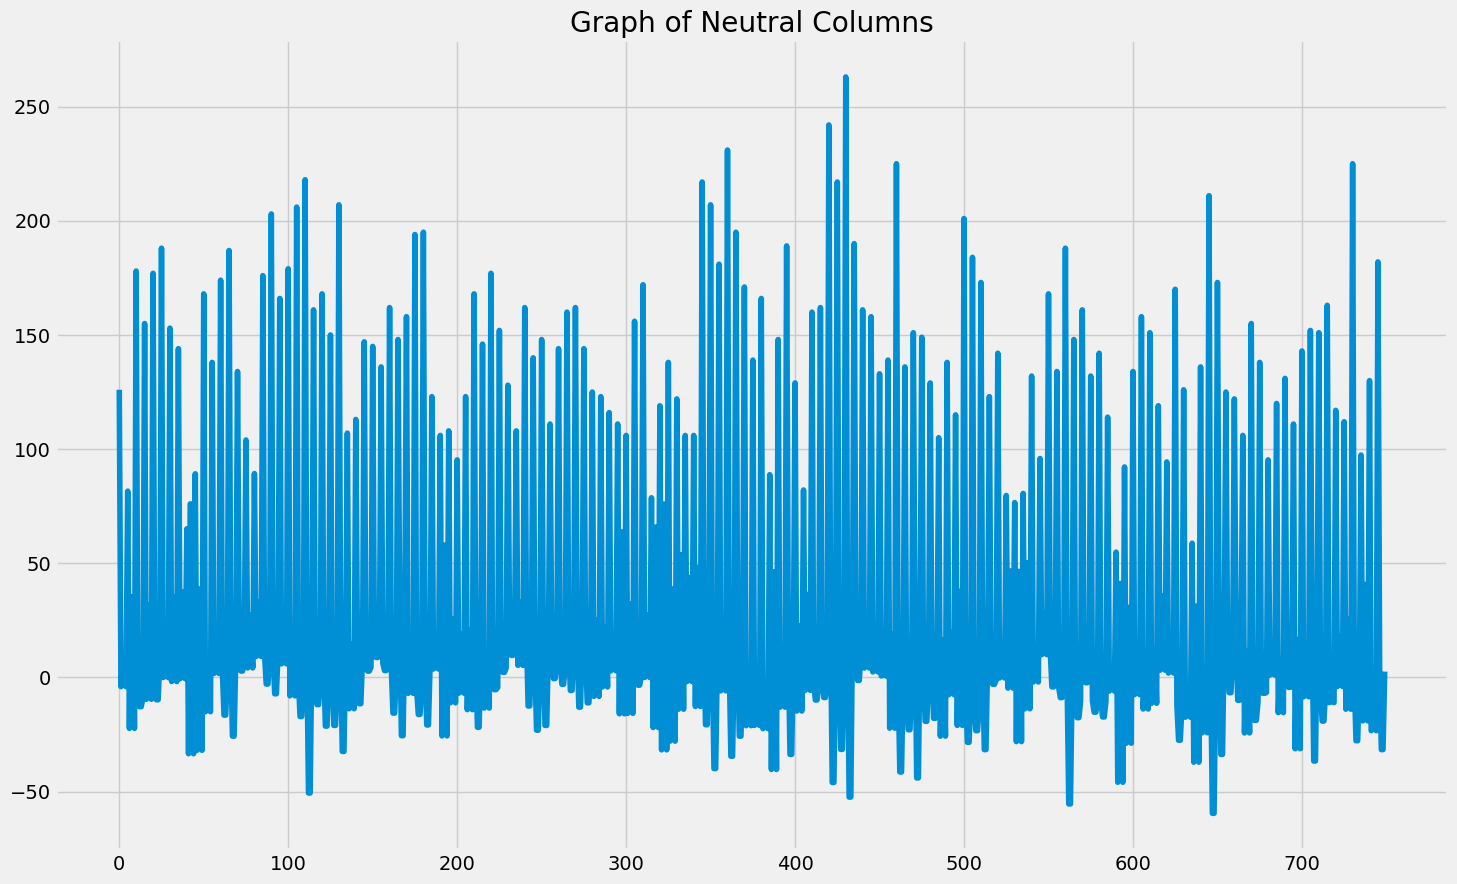

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [8]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()
'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

In [9]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [10]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
x_train.shape[1]

2548

**LSTM**

In [11]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [12]:
#creating model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 [==============================] - 195s 4s/step - loss: 0.4033 - accuracy: 0.8931 - val_loss: 0.2232 - val_accuracy: 0.9181
Epoch 2/10
48/48 [==============================] - 201s 4s/step - loss: 0.1726 - accuracy: 0.9387 - val_loss: 0.2347 - val_accuracy: 0.9064
Epoch 3/10
48/48 [==============================] - 195s 4s/step - loss: 0.1303 - accuracy: 0.9485 - val_loss: 0.1033 - val_accuracy: 0.9591
Epoch 4/10
48/48 [==============================] - 199s 4s/step - loss: 0.0915 - accuracy: 0.9674 - val_loss: 0.1451 - val_accuracy: 0.9298
Epoch 5/10
48/48 [==============================] - 198s 4s/step - loss: 0.0480 - accuracy: 0.9831 - val_loss: 0.0706 - val_accuracy: 0.9766
Epoch 6/10
48/48 [==============================] - 199s 4s/step - loss: 0.0498 - accuracy: 0.9811 - val_loss: 0.1189 - val_accuracy: 0.9474
Epoch 7/10
48/48 [==============================] - 199s 4s/step - loss: 0.1025 - accuracy: 0.9681 - val_loss: 0.1521 - val_accuracy: 0.9532
Epoch 8/10
48

In [19]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 22.713810205459595 
Accuracy on Training: 94.84777450561523


In [20]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 [==============================] - 17s 1s/step


In [29]:
#Creation of Function of Confusion Matrix
def ConfusionMatrixDisplay(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [22]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [118]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("Actual: ",y_test1[:10])

Predicted:   [1 1 1 0 1 1 2 1 2 1]
Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[150   3   0]
 [  2 124  16]
 [  1   0 131]]


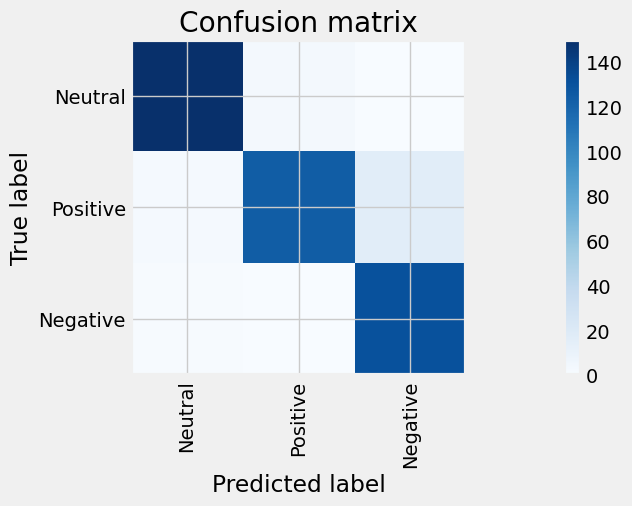

In [32]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
ConfusionMatrixDisplay(cm, ["Neutral","Positive","Negative"])

In [26]:
names1 = ["Neutral","Positive","Negative"]

# **Training Datasets** 

Training our datasets on different Classifiers to check the results and creating their classification reports. The different datasets applied are:


*   Naive Bayer Classifier
*   Support Vector Machine (SVM)
*   Logistic Regression
*   Decision Tree
*   Random Forest




In [119]:
### Naives Bayes Classifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)


### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)


### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)


### Decision Tree 

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Decision Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)


### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)

print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))



*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.93 

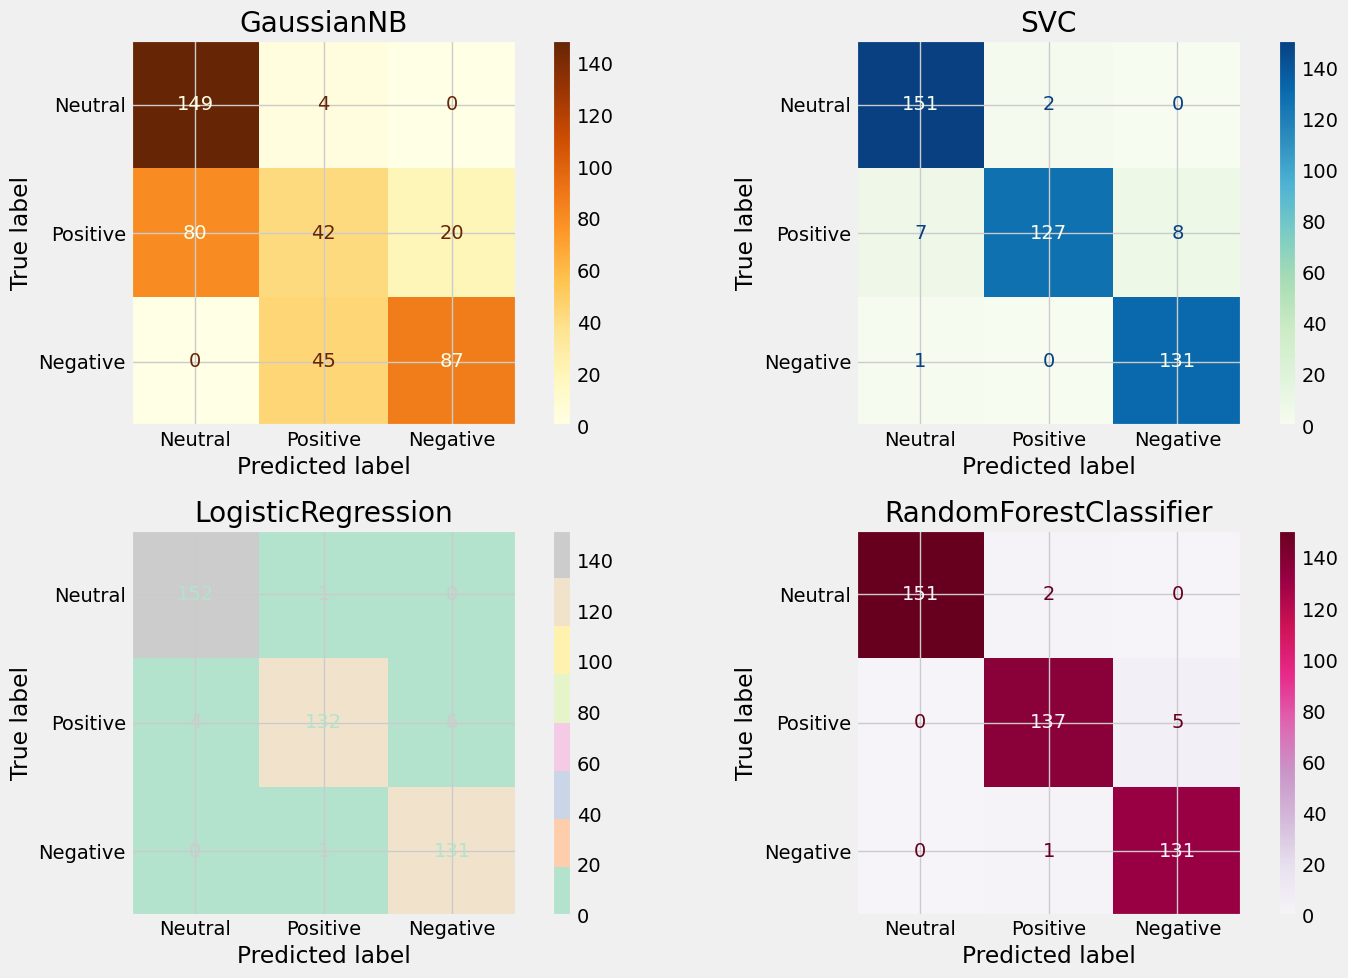

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]

for cls in classifiers:
    cls.fit(x_train,np.argmax(y_train,axis=1))

colors = [ 'YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, a, c in zip(classifiers, axes.flatten(),colors):
  ConfusionMatrixDisplay.from_estimator(cls, 
                           x_test, 
                           np.argmax(y_test,axis=1), 
                           ax = a,
                           cmap=c,
                           display_labels= names1)
  a.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

# **XGBoost**
XGBoost is a ensemble machine-learning algorithm that can help you understand your data and make better decisions. XGBoost is an implementation of gradient-boosting decision trees.

In [56]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
print(model)
y_pred = model.predict(x_test)
predictions = []
for x in y_pred:
    predictions.append(x)
    print(x, end=' ')
accuracy = accuracy_score(y_test, predictions)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
[0. 1. 0.] [0. 1. 0.] [0. 1. 0.] [0. 0. 0.] [0. 1. 0.] [0. 1. 0.] [0. 0. 1.] [0. 1. 0.] [0. 0. 1.] [0. 1. 0.] [0. 0. 1.] [0. 0. 1.] [0. 0. 1.] [0. 1. 0.] [0. 0. 1.] [0. 1. 0.] [0. 0. 1.] [1. 0. 0.] [1. 0. 0.] [0. 0. 0.] [1. 0. 0.] [0. 1. 0.] [1. 0.

In [64]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


xgb_clf = xgb.XGBClassifier()

parameters_xgb =    {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [50, 100, 150],
            'gamma': [0, 0.1, 0.2],
            'min_child_weight': [0, 0.5, 1],
            'max_delta_step': [0],
            'subsample': [0.7, 0.8, 0.9, 1],
            'colsample_bytree': [0.6, 0.8, 1],
            'colsample_bylevel': [1],
            'reg_alpha': [0, 1e-2, 1, 1e1],
            'reg_lambda': [0, 1e-2, 1, 1e1],
            'base_score': [0.5]
            }

search_xgb = RandomizedSearchCV(xgb_clf, parameters_xgb, n_jobs=-1)
search_xgb.fit(x_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'base_score': [0.5],
                                        'colsample_bylevel': [1],
                                        'colsample_bytree': [0.6, 0.8, 1],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_delta_step': [0],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [0, 0.5, 1],
                                        'n_estimators': [50, 100, 150],
                                        'reg_alpha': [0, 0.01, 1, 10.0],
                                        'reg_lambda': [0, 0.01, 1, 10.0],
                                        'subsample': [0.7, 0.8, 0.9, 1]})

In [121]:
best_xgb = search_xgb.best_estimator_
print(best_xgb)
print("\n")
print("The best accuracy achieved within the model is:", search_xgb.best_score_)

XGBClassifier(base_score=0.5, booster=None, callbacks=None, colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=4, max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)


The best accuracy achieved within the model is: 0.9847507331378299


In [116]:
best_xgb.score(x_test, y_test)

X_test_np = np.array([x_test[98]])
best_xgb.predict(X_test_np)

array([[1., 0., 0.]])

# Deep Learning Model : **LSTM** 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 

In [46]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 [==============================] - 16s 1s/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.98      0.87      0.92       142
           2       0.89      0.99      0.94       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



# **Plotting Graph of LSTM Model**

This graph represents Training, Loss and Accuracy of the model based on our dataset of EEG Waves.

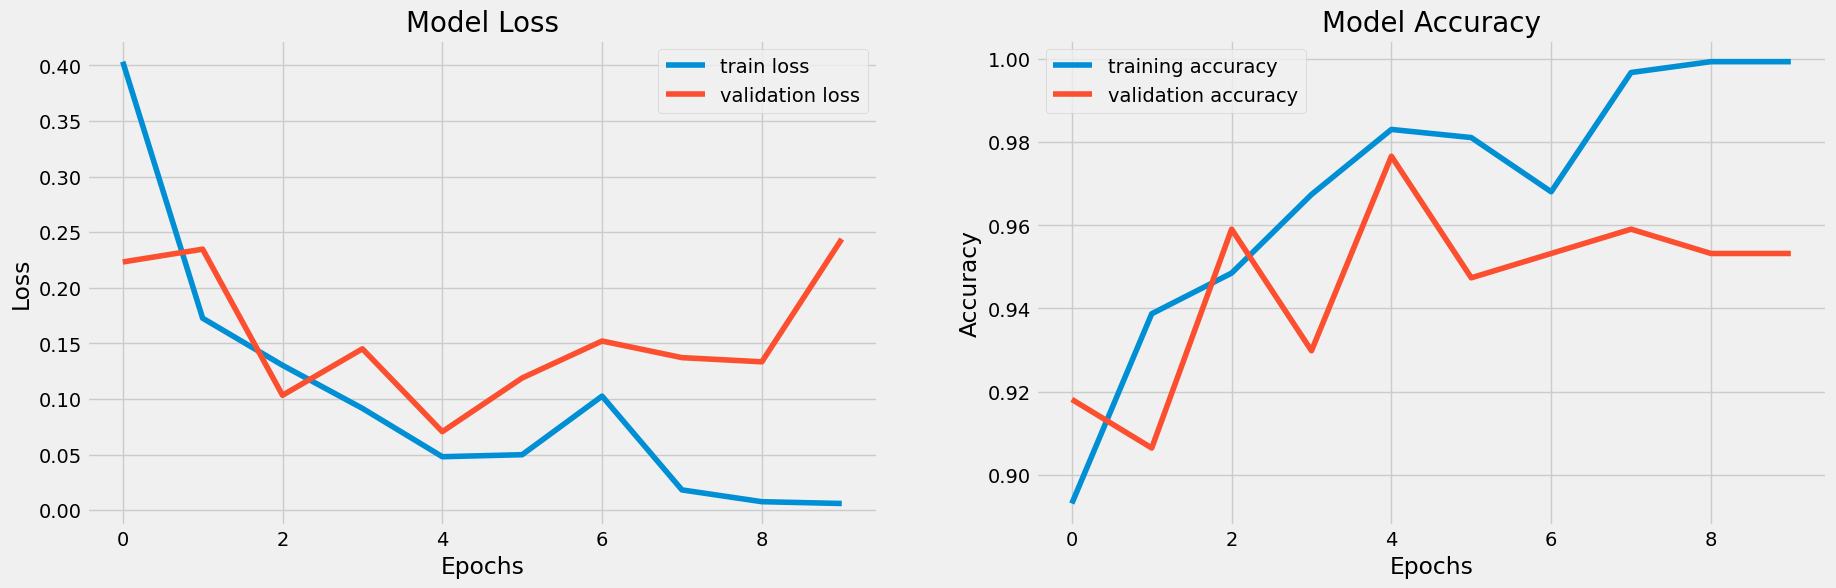

In [47]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

# Deep Learning Model : **ANN** 
ANN stands for Artifical Neural Networks. The brain is made up of billions of cells called neurons connected via synapses. New observations and experiences not only alter the strength of those synaptic connections, but their accumulation drives convergence of the connections strength — resulting in “learning”.

In [99]:
model1 = Sequential()

In [100]:
model1.add(Dense(32, activation='relu', input_shape=(1,2548)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(3, activation="softmax"))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 32)             81568     
                                                                 
 dense_1 (Dense)             (None, 1, 32)             1056      
                                                                 
 dense_2 (Dense)             (None, 1, 32)             1056      
                                                                 
 dense_3 (Dense)             (None, 1, 3)              99        
                                                                 
Total params: 83,779
Trainable params: 83,779
Non-trainable params: 0
_________________________________________________________________


Training ANN

In [106]:
from keras.utils import to_categorical

X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(x_train, y_train, test_size = 0.2, random_state = 4)

y_train_ann = to_categorical(y_train_ann, 2)
y_val_ann = to_categorical(y_val_ann, 2)

          x - x - x - x - x - x

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

brainwave_df = pd.read_csv('/content/emotions.csv')

In [123]:
y = brainwave_df['label'].value_counts()
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [124]:
label_df = brainwave_df['label']
brainwave_df.drop('label', axis = 1, inplace=True)

# **CORRELATION**

In [125]:
correlations = brainwave_df.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,0.268983,0.153244,0.674195,0.103294,-0.039620,0.024944,-0.043387,0.098389,-0.022019,-0.003329,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.220566,-0.096173,-0.728296,-0.061376,0.056452,0.002976,-0.001477,-0.061713,0.005671,-0.005395,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [126]:
skew = brainwave_df.skew()
skew

# mean_0_a    3.839961
mean_1_a     -5.400903
mean_2_a     -1.769376
mean_3_a      0.293842
mean_4_a     -3.911369
                ...   
fft_745_b    -1.328085
fft_746_b     1.443938
fft_747_b     1.221094
fft_748_b     1.221094
fft_749_b     1.443938
Length: 2548, dtype: float64

# **RANDOM FOREST**

In [133]:
%%time 
pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

Accuracy for RandomForest :  0.9878087841691896
CPU times: user 46.4 s, sys: 95.5 ms, total: 46.5 s
Wall time: 50.2 s


# **PCA**

In [128]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(brainwave_df)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.3677256411753877
Explained Variance ratio by Principal Component  2  :  0.09553894257232638
Explained Variance ratio by Principal Component  3  :  0.08436069000482507
Explained Variance ratio by Principal Component  4  :  0.06085665181970185
Explained Variance ratio by Principal Component  5  :  0.04745373292625155
Explained Variance ratio by Principal Component  6  :  0.03082305251847155
Explained Variance ratio by Principal Component  7  :  0.024721620860921265
Explained Variance ratio by Principal Component  8  :  0.013753055070757856
Explained Variance ratio by Principal Component  9  :  0.012408702721150657
Explained Variance ratio by Principal Component  10  :  0.012103653572116558
Explained Variance ratio by Principal Component  11  :  0.009557100565804581
Explained Variance ratio by Principal Component  12  :  0.00916431101796424
Explained Variance ratio by Principal Component  13  :  0.00874005732342953
Explained Varianc

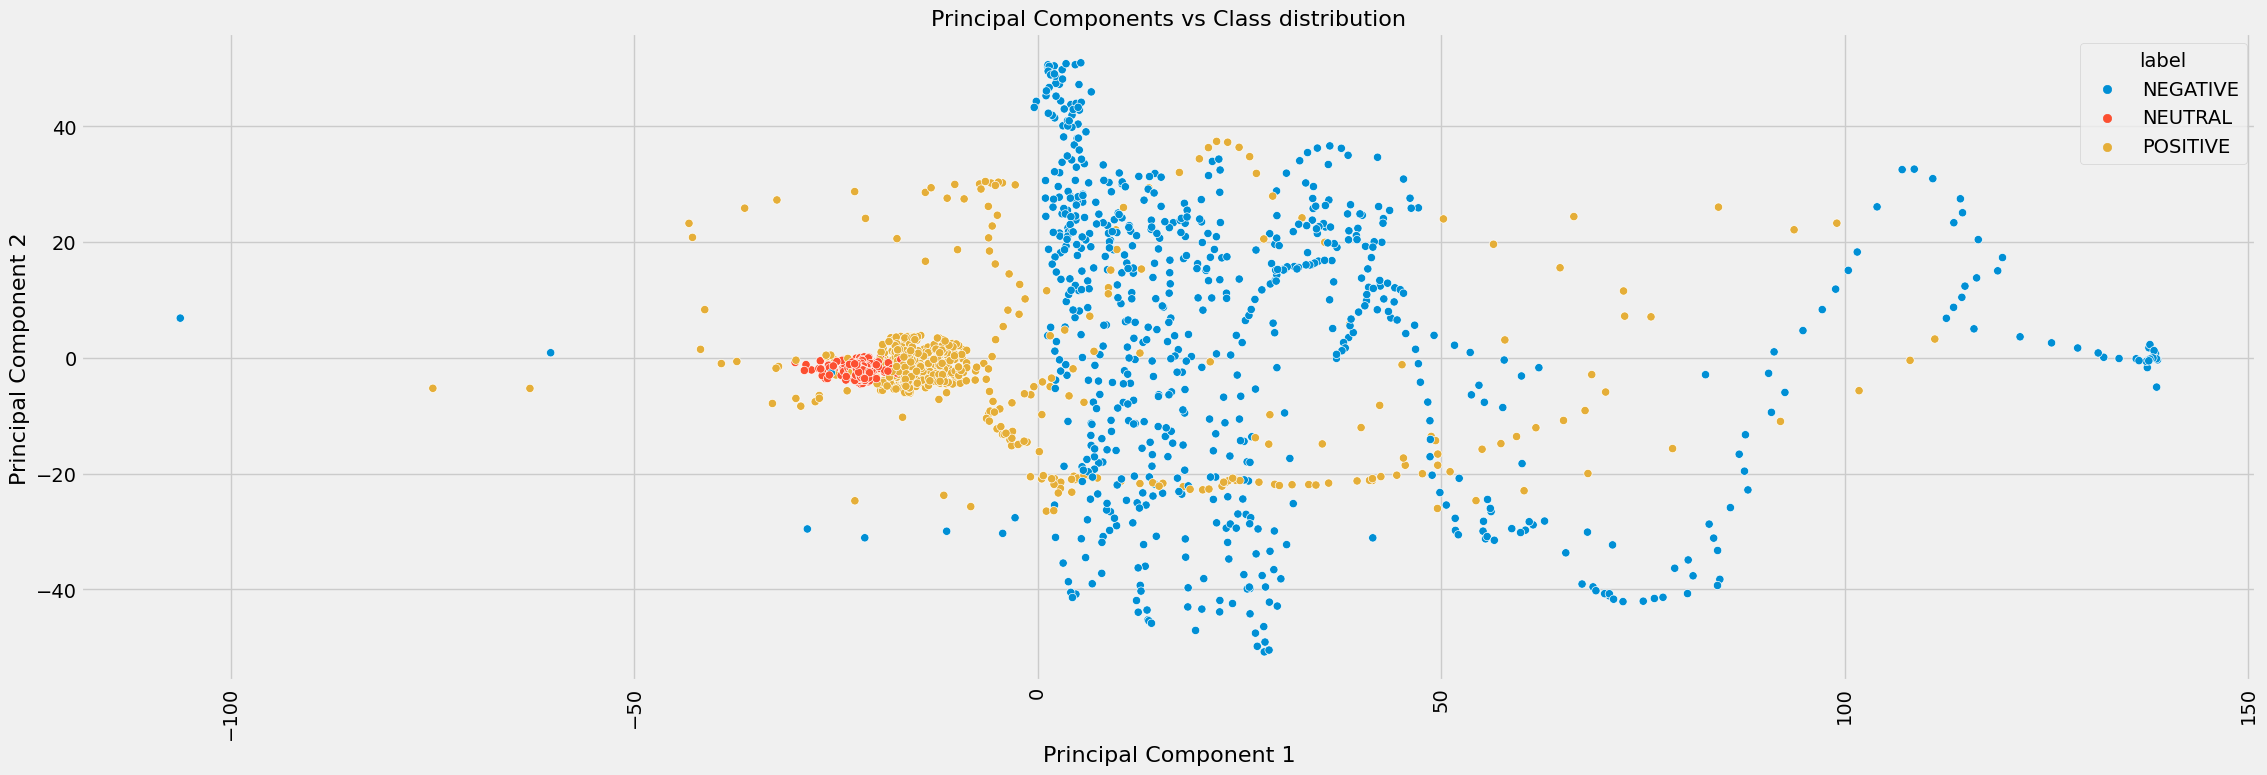

In [129]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

# **Logistic Regression classifier with these two PCs**

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.7753213987977711
CPU times: user 6.03 s, sys: 4.55 s, total: 10.6 s
Wall time: 5.71 s


# **Logistic Regression classifier with these 10 PCs**

In [135]:
%%time
pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 10 Principal Components:  0.86678513448291
CPU times: user 7.05 s, sys: 4.81 s, total: 11.9 s
Wall time: 7.09 s


# **ANN**

In [136]:
%%time

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.9751480847703041
CPU times: user 10min 42s, sys: 2min 30s, total: 13min 12s
Wall time: 7min 26s
